# Multiple Linear Regression 

In the previous chapter, we have learned about Simple Linear Regression, where a single Independent/Predictor(X) variable is used to model the response variable (Y). But there may be various cases in which the response variable is affected by more than one predictor variable; for such cases, the Multiple Linear Regression algorithm is used.

Moreover, Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable



## Problem Statement

We have a dataset taken from the book called An Introduction to Statistical learning. 

### Objective :
- Understanding the dataset using EDA
- To varification of the assumptions of the model.
- How strong the relationship is between two or more independent variables and one dependent variable.

### Dataset Information

- Mpg($y$)- it is the fuel efficiency.
- Cylinder($x_1$)- Number of cylinder between 4 and 8.
- Displacement($x_2$)- Engine dispacement.
- Horsepower($x_3$)- power of an engine.
- Weight($x_4$)- This is weight.
- Acceleration($x_5$) - Time to accelerate from 0 to 60 mph.
- Model year($x_6$)- It is the model year of the car.
- Origin($x_7$) - (1. American, 2.European,3.japanese)

### Importing the necessary libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
import sympy as sym    
import scipy.stats as ss

In [7]:
data=pd.read_csv("auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
print(data.shape)    # Size of the data.

(398, 9)


In [9]:
print(data.describe().T)

              count         mean         std     min       25%     50%  \
mpg           398.0    23.514573    7.815984     9.0    17.500    23.0   
cylinders     398.0     5.454774    1.701004     3.0     4.000     4.0   
displacement  398.0   193.425879  104.269838    68.0   104.250   148.5   
weight        398.0  2970.424623  846.841774  1613.0  2223.750  2803.5   
acceleration  398.0    15.568090    2.757689     8.0    13.825    15.5   
model year    398.0    76.010050    3.697627    70.0    73.000    76.0   
origin        398.0     1.572864    0.802055     1.0     1.000     1.0   

                   75%     max  
mpg             29.000    46.6  
cylinders        8.000     8.0  
displacement   262.000   455.0  
weight        3608.000  5140.0  
acceleration    17.175    24.8  
model year      79.000    82.0  
origin           2.000     3.0  


In [10]:
sum(data.horsepower=='?')

6

In [11]:
data['horsepower']=data['horsepower'].replace('?',np.nan).astype(float)   # astype is used to change the datatype

In [12]:
data.isna().sum()    # For detecting nan value

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
data['horsepower']=data['horsepower'].fillna(data['horsepower'].median())
data.isna().sum()   # Here Nan Value is replaced by median.

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

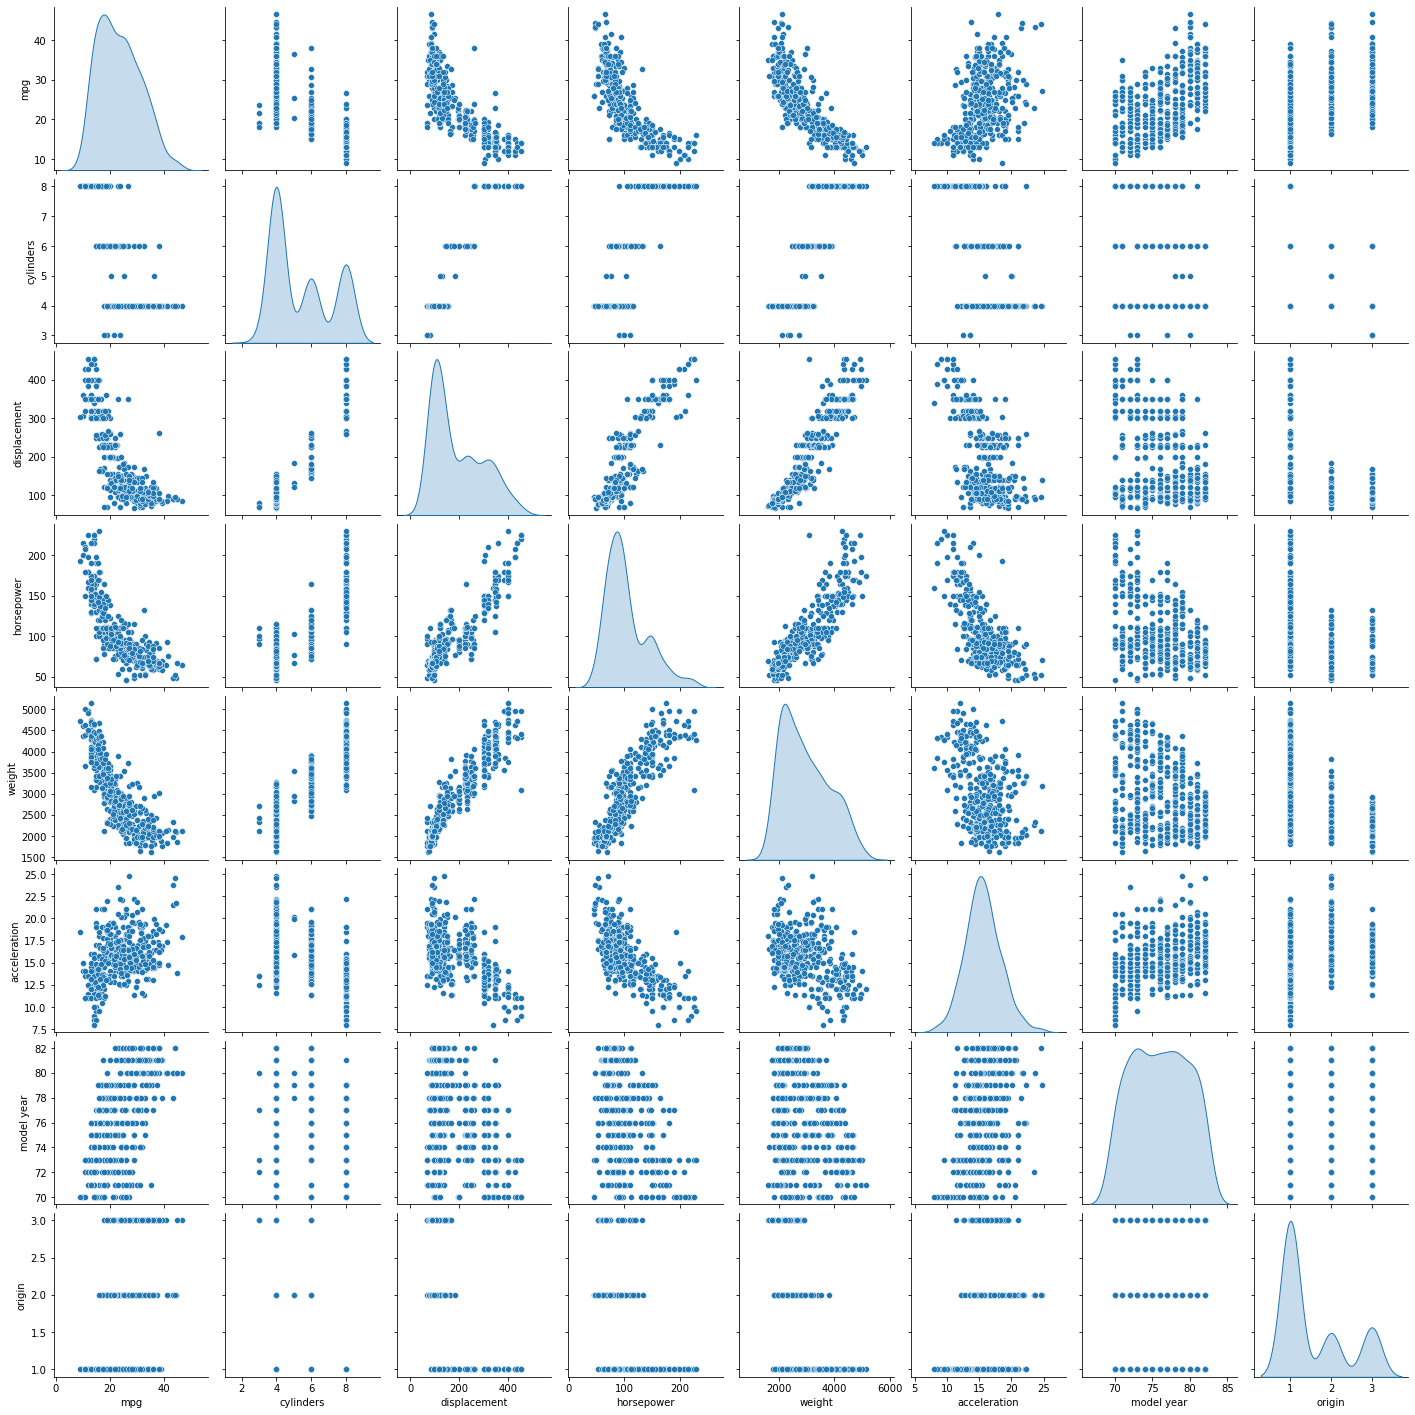

In [14]:
sns.pairplot(data,diag_kind='kde')

<AxesSubplot:>

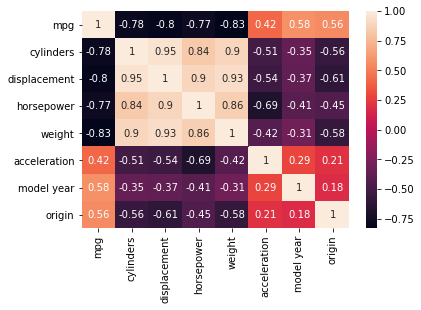

In [15]:
data_cor=data.iloc[:,:-1]   # Exclude car_name qualitative variable.
data_cor
sns.heatmap(data_cor.corr(),annot=True)

In [16]:
x=data.drop(['mpg','car name'],axis=1)   #axis=1 represents columns
y=data['mpg'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)


In [17]:
print(model.coef_)   

[-0.67811293  2.19964019 -0.74853591 -5.4364769   0.52300159  2.71796905
  1.26779263]


In [18]:
print(model.intercept_)  

23.5748427672956


In [19]:
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train)   #dependent variable is also concerned by the constant term 'a'.Hence we add constant term.
#x_train_lm                            #y=a+b*x

In [20]:
Result=sm.OLS(y_train,x_train_lm).fit()
print(Result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     200.2
Date:                Thu, 19 May 2022   Prob (F-statistic):          5.37e-111
Time:                        07:03:30   Log-Likelihood:                -831.29
No. Observations:                 318   AIC:                             1679.
Df Residuals:                     310   BIC:                             1709.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5748      0.188    125.622      0.0

**Interpretation**  
-In statistics the AIC is used to compare different possible models and determine which  one is the best fit for the data.
Lower AIC values indicate a better-fit model.In these example the AIC value is 1679 then these value is very high then model 
not better fit.  
Model with lower BIC are generally prefered but in these example BIC is high 1709.  
If the skewness is between 0.5 to 1, the data are moderately skewed.  
If the number of kurtosis  is greater than +1, the distribution is too peaked.  
The value of Durbin-Waston is below 2.0 mean there is positive autocorrelation here Durbin-Waston value is 1.902 mean their is no autocorrelation. 

Coefficient Of Determination $R^2$ value the model is good fitted. There is 81% variation of the all predictors such as cylinder,weight is explained by as the response mpg variable.  

$R^2$ adj value is 0.815 so it is very well fitted model.  

Here, $R^2$ and $Adj R^2$ are close enough then we have selected relvent predictor.


**>Test of significance of overall regression model.F-test**

We can evaluate the significance of our model.

$H_0:\beta_1=\beta_2=\beta_3=\beta_4=\beta_5=\beta_6=\beta_7=0$
Vs

$H_1: \beta_j!= 0$ for at least one j.

Here F-statistics value is 200.2 And p_value is  5.37e-111.  

**There is linear relationship between mpg y and at least one of the regressor from the $x_1$,$x_2$....$x_7$ explaining variation in y. Hence we reject $H_0$ at 5 % level of significance**

**>Which predictor appears to have statistically significant realtionship to the response?**  

The T-test is the coefficient divided by its standard error. from the t-test we decided that the given feature is significant to the target variable.

**$H_0: \beta_i=0$ vs $H1:\beta_i\neq0$ for at least one i. i=1,2....7**

The variable displacement contributes significantly to the model in the presence of all other variable.  
The variable weight contributes significantly to the model in the presence of all other variable.  
The variable model year contributes significantly to the model in the presence of all other variable.  
The variable origin contributes significantly to the model in the presence of all other variable.  

**Variance Inflation Factor(VIF)**  
It is used to measure the amount of multicollinearity in the set of multiple regression variables.

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#the independent variables set.
X=data[['displacement','weight','acceleration','model year','origin']]
#VIF Dataframe
vif_data=pd.DataFrame()
vif_data['features']=X.columns
#Calculate VIF for each feature.
vif_data['VIF']=[variance_inflation_factor(X.values,i)
                for i in range(len(X.columns))]
print(vif_data)

       features         VIF
0  displacement   47.302622
1        weight  113.413924
2  acceleration   50.118246
3    model year   87.775314
4        origin    7.476012


Here is the VIF is greater than 5 or 10 so the Multicollinearity is present in the above regressors.
We used here PCA technique.  
**Principal Component Analysis(PCA)**  is a technique for reducing the dimensionality of
such datasets, increasing interpretability but at the same time minimizing information loss.
PCA is statastical procedure that allows you to summarize the information content in large data tables by means of a smaller set of summary indices that can be more easily visualized and analyzed. Using PCA can identify the correlation between the data 
points.

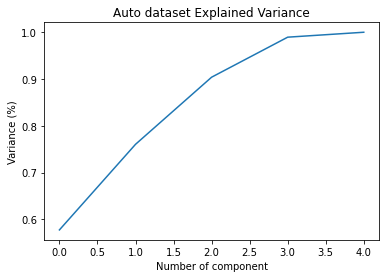

In [22]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)  
from sklearn.decomposition import PCA
pca=PCA().fit(X_std)
#plotting the cummulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of component")
plt.ylabel("Variance (%)")   #for each component
plt.title("Auto dataset Explained Variance")
plt.show()

Used for standardized means the inputs by removing mean value from every value for that column and dividing it by the variance that exists for that column. Plot the overall Variance explained by each component.  
When we apply PCA the only difference is rather than plotting individual contributions We plot overall cumulative sum of the contributions, So the sum total of contribution turns out to be 1 or 100% the here the first principal component value is greather than 0.76 and other values are add up to the total of 1

In [23]:
np.cumsum(pca.explained_variance_ratio_)    # cumulative contribution captured by variance

array([0.57756513, 0.76046924, 0.90393239, 0.98946106, 1.        ])

In [24]:
**Finding principal componenets**  
By taking 2 components we fit the model again.

SyntaxError: invalid syntax (<ipython-input-24-94c18e0ed6f9>, line 1)

In [ ]:
from sklearn.decomposition import PCA
x=StandardScaler().fit_transform(x)
pca=PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca.shape
pca.explained_variance_ratio_   

In [ ]:
x_train_pca,x_test_pca,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LinearRegression
model_2=LinearRegression()
model_2.fit(x_train_pca,y_train)
model_2.score(x_test_pca,y_test)    # Here the accuracy is reduced

In [ ]:
new_var=data[['origin','model year']]
#VIF Dataframe
vif_data=pd.DataFrame()
vif_data['features']=new_var.columns
#Calculate VIF for each feature.
vif_data['VIF']=[variance_inflation_factor(new_var.values,i)
                for i in range(len(new_var.columns))]
print(vif_data)

The VIF is less than 5, Hence Multicollinearity is removed by taking the only 2 component.

**Assumption Testing of Multiple Linear Regression.** 

**1)Multicollinearity**

In the given dataset Multicollinerity is also present.Multicollinearity means dependence between the independent variable. We showed it above by Variance Inflation Factor.We removed it by appling PCA technique.

**2) Normality Assumption**

In [ ]:
residual=y_test-ypred
sns.distplot(residual)

The residual plot is positively skewd.

In [ ]:
shapiro=ss.shapiro(y)
shapiro

**$H_0$: The data is come from normal distribution. Vs
    $H_1$: The data is not come from Normal distribution**
    
Shapiro-Wilk test is test of normality, it determine weather the sample is comes from the Normal distribution or not.
p-value is less than 0.05, Here We reject $H_0$.

**3)Homoscedasticity Assumption**

In [ ]:
sns.scatterplot(ypred,residual)

Here is no pattern in the above residual vs fitted value graph.Hence we say that Heteroscedastic in nature  
**To detect Homoscedasticity We used Breusch-pagon Test**

$H_o$ : Homoscedasticity is present. vs
$H_1$ :Homoscedasticity is not present

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#Perform Breusch-pagon Test
names=['Langrange multiplier', 'p_value']
test=sms.het_breuschpagan(Result.resid,Result.model.exog)
lzip(names,test)

from Langrange multiplier statistics for the model is 22.191 and the corresponding p-value is 0.0023.p-value is less than 0.05, We reject the null Hypothesis.

It means that Heteroscdasticity is present.

**4)Autocorrelation**

Autocorrelation is correlation of the errors(Residuals) over time. Autocorrelation exists if residuals in one time period are related to residuals in another period.We can detect Autocorrelation by performing Durbin-Watson test to determine weather positive or negative correlation is present.
In our data Durbin-Watson value is  1.902. If the value is between 1.5 and 2.5 then there is no Autocorrelation and the Assumption is satisfies.



**We used log,sqrt and exponential Transformation, but assumption is not satisfied.**